# 🚌 Mapa Interativo dos Terminais Urbanos - Uberlândia

Este notebook cria um mapa interativo exibindo os Terminais Urbanos da cidade de Uberlândia. Utiliza dados geográficos para desenhar as zonas dos bairros e posicionar os terminais no mapa, com agrupamento inteligente de marcadores.

As bibliotecas principais usadas são: Folium, GeoPandas e OpenStreetMap.

---


## 📥 Carregamento dos Dados

In [2]:
import folium
from pathlib import Path
import geopandas as gpd
from folium import Map, Marker, CustomIcon, Element
import sys
import os
from folium.plugins import MarkerCluster

In [3]:
caminho_raiz = os.path.abspath(os.path.join(".."))  # Ajuste os ".." conforme a profundidade do notebook
sys.path.append(caminho_raiz)

# import dos dic dos terminais de ônibus
from utils.listas import Dic_Terminais 
from utils.listas import Dic_Terminal_Obra
from utils.creditos import creditos_html

In [4]:
geojson_path = Path("..") / "data" / "bairros_uberlandia.geojson"
gdf_bairros = gpd.read_file(geojson_path)

## 🗺️ Construção do Mapa

### 📍 Visualização das zonas territoriais
O mapa abaixo apresenta os bairros de Uberlândia coloridos de acordo com sua zona territorial (Norte, Sul, Leste, Oeste, Central). As informações foram extraídas do GeoJSON e renderizadas com `folium.GeoJson`.


In [5]:
# cria o mapa
mapa = folium.Map(location=[-18.914, -48.275], zoom_start=12)

titulo_html = """
     <h1 align="center" style="font-size:26px"><b>Uberlândia-MG</b></h1>
     """
mapa.get_root().html.add_child(Element(titulo_html))
# adiciona os bairros direto (sem for)
folium.GeoJson(
    gdf_bairros,
    style_function=lambda feature: {
        "fillColor": feature["properties"]["cor"],
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["bairro", "zona_territorial"],
        aliases=["Bairro:", "Zona:"])
).add_to(mapa)
mapa.save("../MapsHTML/mapa_Uberlandia.html")
mapa.get_root().html.add_child(Element(creditos_html))

mapa


### 🚏 Adição dos terminais de ônibus
Os ícones azuis e verdes representam os terminais atualmente em funcionamento. Cada marcador inclui o nome do terminal e sua localização.



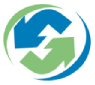
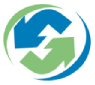
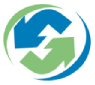
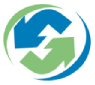
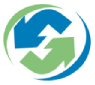
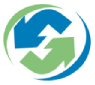
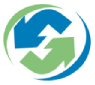
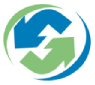

In [8]:
# cria o mapa
mapa = folium.Map(location=[-18.914, -48.275], zoom_start=12)

titulo_html = """
     <h1 align="center" style="font-size:26px"><b>Terminais de Ônibus - Uberlândia</b></h1>
     """
mapa.get_root().html.add_child(Element(titulo_html))
# adiciona os bairros direto (sem for)
folium.GeoJson(
    gdf_bairros,
    style_function=lambda feature: {
        "fillColor": feature["properties"]["cor"],
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["bairro", "zona_territorial"],
        aliases=["Bairro:", "Zona:"])
).add_to(mapa)

# adiciona os pontos dos terminais com for
for nome, info in Dic_Terminais.items():
    folium.Marker(
        location=[info["lat"], info["lon"]],
        tooltip=
            f'Terminal: {nome}<br>Nome: {info["nome"]}<br>Endereço: {info["endereco"]}',
        icon=folium.CustomIcon(
            icon_image='../icons/logoSIT.png',
            icon_size=(30, 30)
        )
    ).add_to(mapa)
mapa.save("../MapsHTML/mapa_TerminaisUberlandia.html")
mapa.get_root().html.add_child(Element(creditos_html))

mapa


### 🚧 Terminal em construção
O ícone amarelo com sinal de alerta representa o Terminal Universitário, uma antiga promessa para a região Sul, próximo ao Uberlândia Shopping.



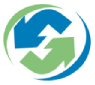
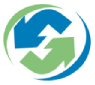
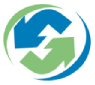
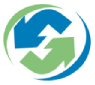
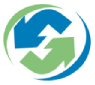
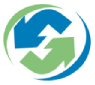
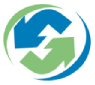
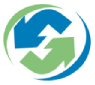
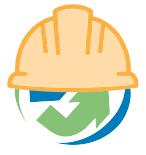

In [9]:
# cria o mapa
mapa = folium.Map(location=[-18.914, -48.275], zoom_start=12)

titulo_html = """
     <h1 align="center" style="font-size:26px"><b>Terminais de Ônibus - Uberlândia | Projeção</b></h1>
     """
mapa.get_root().html.add_child(Element(titulo_html))
# adiciona os bairros direto (sem for)
folium.GeoJson(
    gdf_bairros,
    style_function=lambda feature: {
        "fillColor": feature["properties"]["cor"],
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.6,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["bairro", "zona_territorial"],
        aliases=["Bairro:", "Zona:"])
).add_to(mapa)

# adiciona os pontos dos terminais com for
for nome, info in Dic_Terminais.items():
    folium.Marker(
        location=[info["lat"], info["lon"]],
        tooltip=
            f'Terminal: {nome}<br>Nome: {info["nome"]}<br>Endereço: {info["endereco"]}',
        icon=folium.CustomIcon(
            icon_image='../icons/logoSIT.png',
            icon_size=(30, 30)
        )
    ).add_to(mapa)
for nome, info in Dic_Terminal_Obra.items():
    folium.Marker(
        location=[info["lat"], info["lon"]],
        tooltip=
            f'Terminal: {nome}<br>Nome: {info["nome"]}<br>Endereço: {info["endereco"]}',
        icon=folium.CustomIcon(
            icon_image='../icons/logoSIT_Obras.png',
            icon_size=(30, 30)
        )
    ).add_to(mapa)    
mapa.save("../MapsHTML/mapa_TerminaisUberlandia-Projecao.html")
mapa.get_root().html.add_child(Element(creditos_html))

mapa


# 🚌 Explicação rápida do Mapa de Terminais Urbanos - Uberlândia

- O mapa é inicializado focado em Uberlândia, usando o OpenStreetMap como fundo.
- As zonas territoriais dos bairros são desenhadas a partir de um arquivo GeoJSON (`gdf_bairros`), com cores específicas por zona.
- Cada Terminal Urbano é plotado como um marcador personalizado, com ícone específico para Terminais.
- Todos os terminais são agrupados em uma camada única (`FeatureGroup`).
- Um menu de camadas (`LayerControl`) permite ativar ou desativar a visualização dos Terminais.
- O mapa final é exportado em formato HTML e pode ser aberto fora do Jupyter.

---
